# SC1015 A133 Group 6 - Mini Project

This project is aims to accurately predict whether a patient will have stroke based on some common factors amongs stroke patients. The dataset is from Kaggle. In this notebook, you will find the complete analysis we had done for this project. <br>
This notebook contains <br> 
- Random Forest Model

In [1]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
np.random.seed(100)

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# One Hot Encoding

We use OneHotEncoding to encode categorical variables into its numeric values. There are 7 categorical variables that needed to be encoded.

In [4]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['ever_married','work_type','Residence_type','smoking_status','gender','hypertension','heart_disease']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Check the encoded variables
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 5110 non-null   float64
 1   ever_married_Yes                5110 non-null   float64
 2   work_type_Govt_job              5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Rural            5110 non-null   float64
 8   Residence_type_Urban            5110 non-null   float64
 9   smoking_status_Unknown          5110 non-null   float64
 10  smoking_status_formerly smoked  5110 non-null   float64
 11  smoking_status_never smoked     5110 non-null   float64
 12  smoking_status_smokes           51

In [5]:
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 5110 non-null   float64
 1   ever_married_Yes                5110 non-null   float64
 2   work_type_Govt_job              5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Rural            5110 non-null   float64
 8   Residence_type_Urban            5110 non-null   float64
 9   smoking_status_Unknown          5110 non-null   float64
 10  smoking_status_formerly smoked  5110 non-null   float64
 11  smoking_status_never smoked     5110 non-null   float64
 12  smoking_status_smokes           51

In [6]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['age','avg_glucose_level','bmi']]
data_res = data['stroke']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             4909 non-null   float64
 3   ever_married_No                 5110 non-null   float64
 4   ever_married_Yes                5110 non-null   float64
 5   work_type_Govt_job              5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   float64
 7   work_type_Private               5110 non-null   float64
 8   work_type_Self-employed         5110 non-null   float64
 9   work_type_children              5110 non-null   float64
 10  Residence_type_Rural            5110 non-null   float64
 11  Residence_type_Urban            5110 non-null   float64
 12  smoking_status_Unknown          51

In [7]:
data_ohe = data_ohe.fillna(0)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   ever_married_No                 5110 non-null   float64
 4   ever_married_Yes                5110 non-null   float64
 5   work_type_Govt_job              5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   float64
 7   work_type_Private               5110 non-null   float64
 8   work_type_Self-employed         5110 non-null   float64
 9   work_type_children              5110 non-null   float64
 10  Residence_type_Rural            5110 non-null   float64
 11  Residence_type_Urban            5110 non-null   float64
 12  smoking_status_Unknown          51

# Creating and fitting a classification model

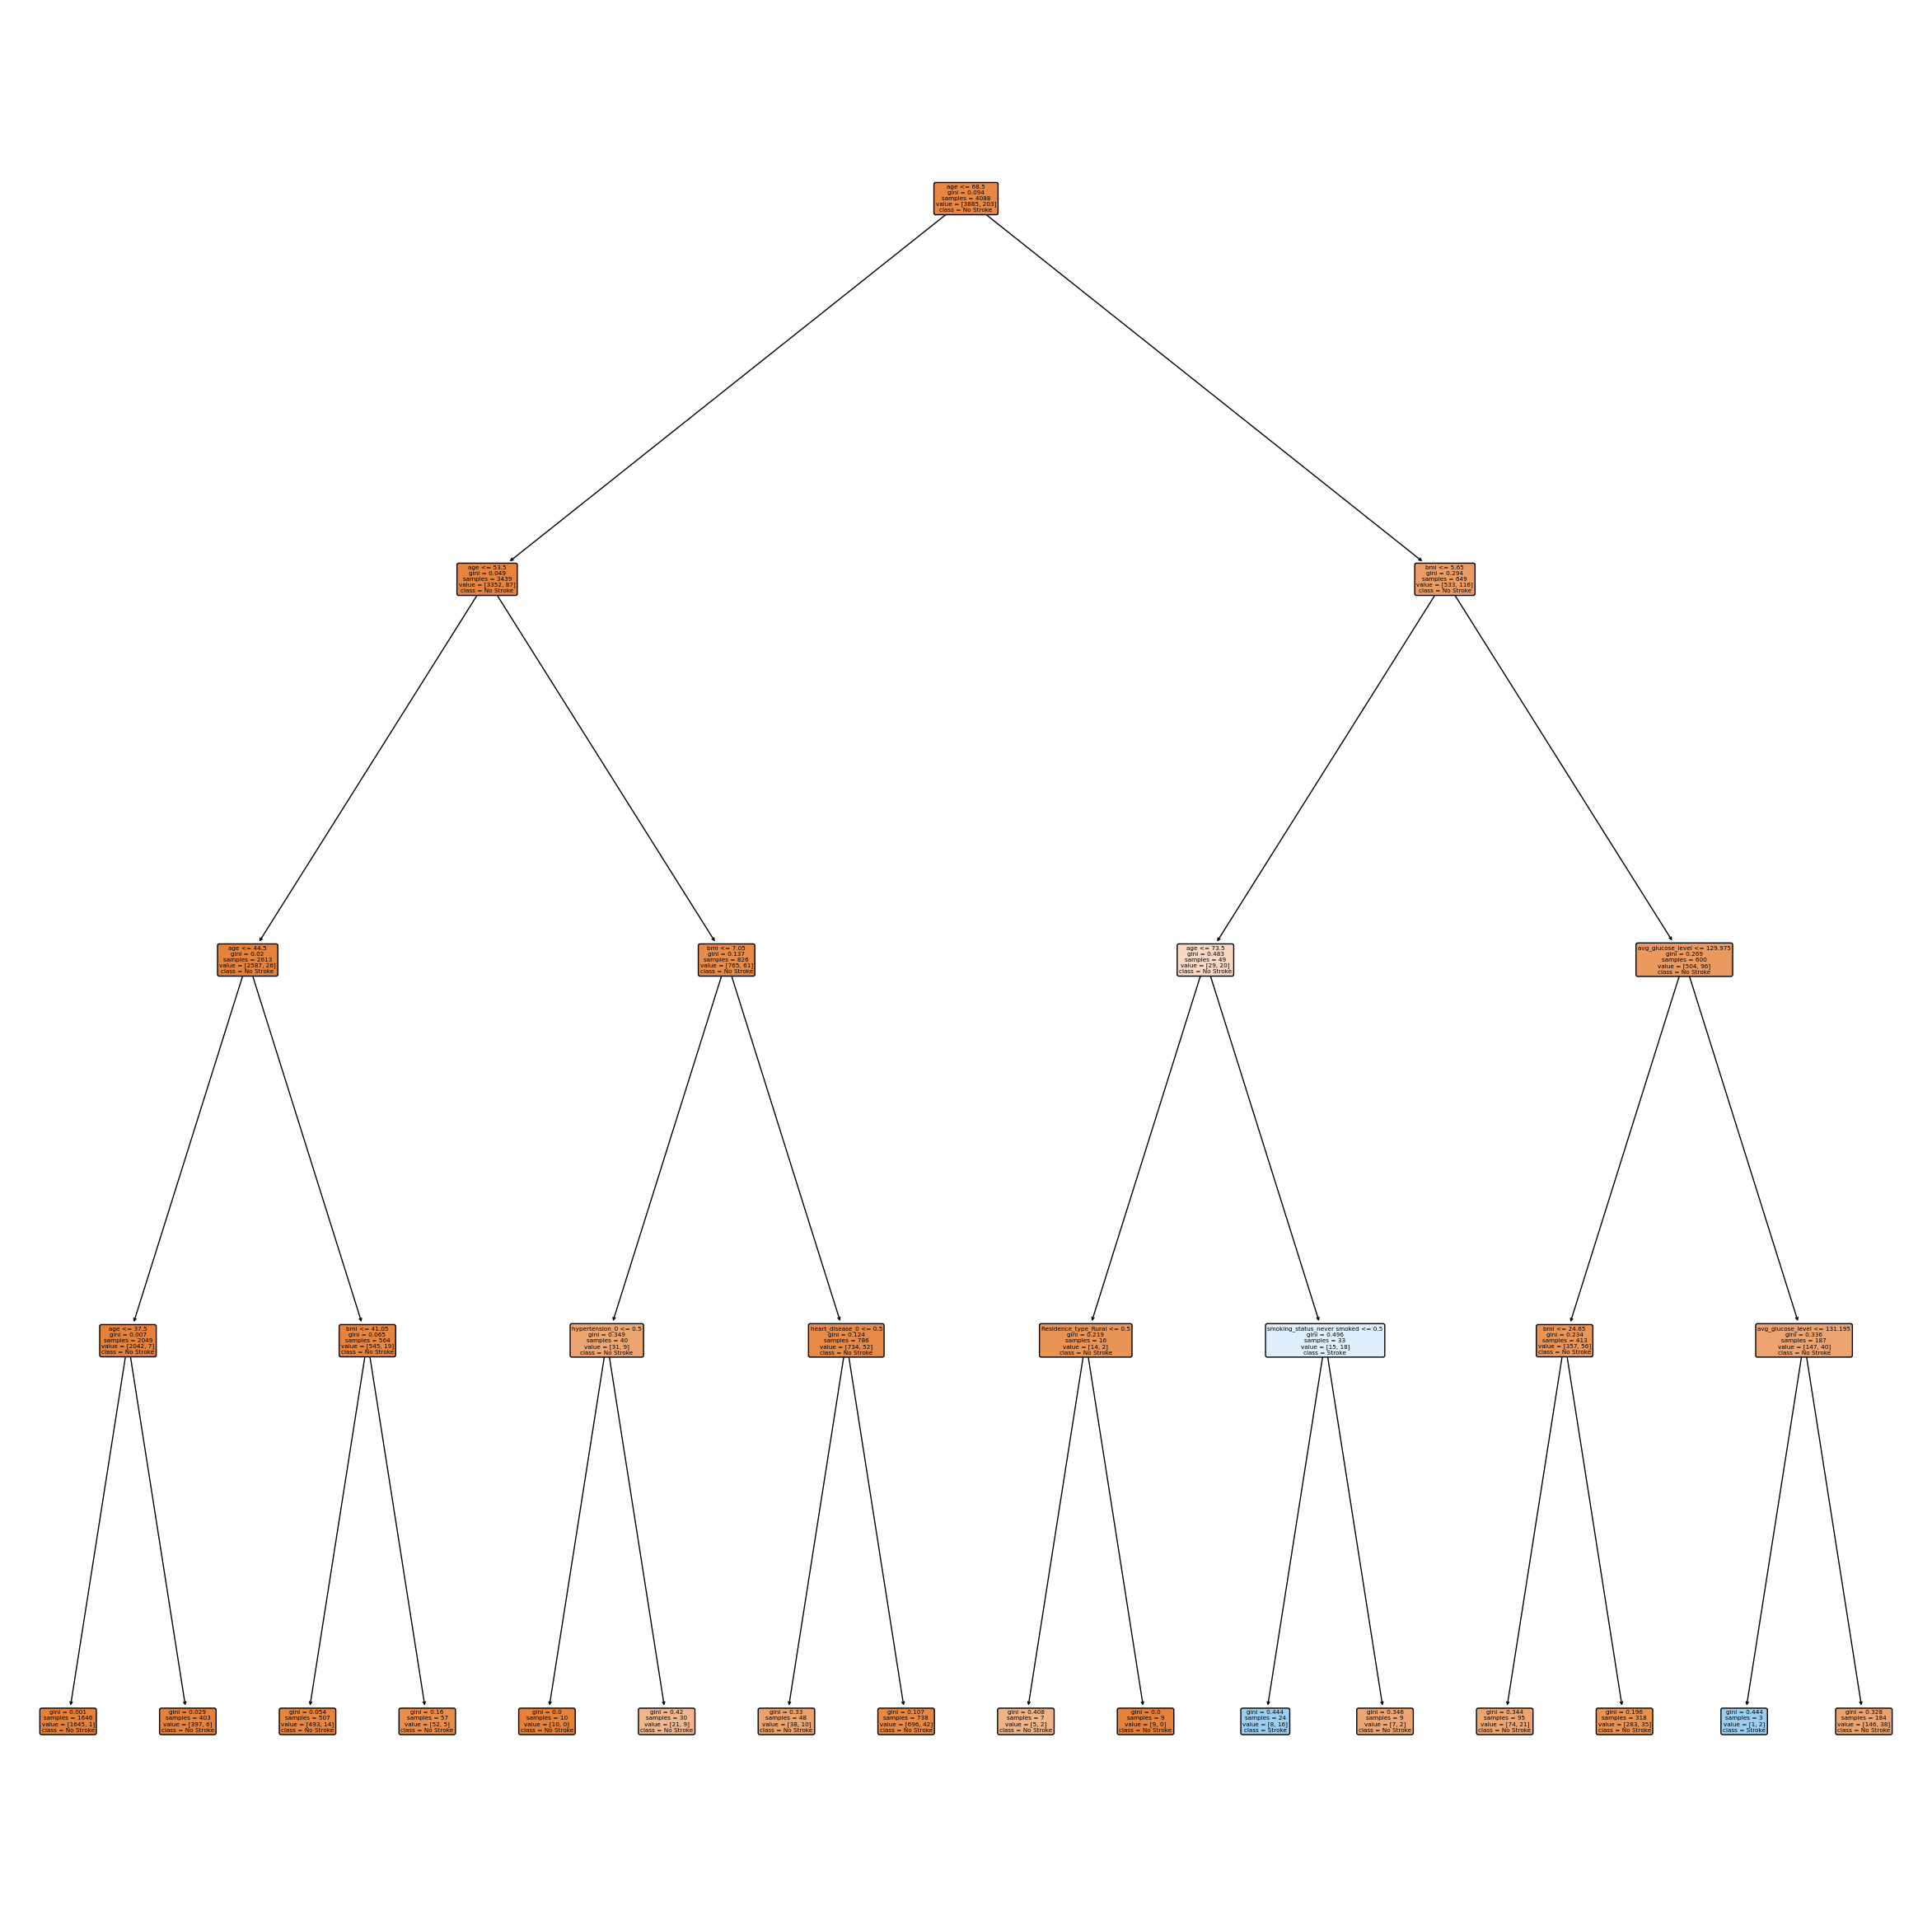

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe['stroke'])
X = pd.DataFrame(data_ohe.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(30,30))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Stroke","Stroke"])
plt.show()

# Checking the accuracy of the model

Classification accuracy and all other accuracy measures from Confusion Matrix.

Train Data
Accuracy  :	 0.9525440313111546

TPR Train :	 0.08866995073891626
TNR Train :	 0.9976833976833976

FPR Train :	 0.0023166023166023165
FNR Train :	 0.9113300492610837


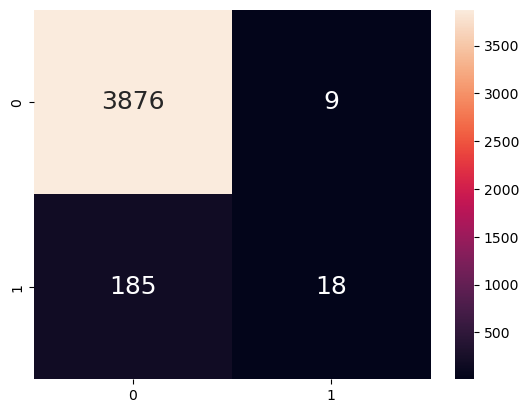

In [9]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.9530332681017613

TPR Test :	 0.043478260869565216
TNR Test :	 0.9959016393442623

FPR Test :	 0.004098360655737705
FNR Test :	 0.9565217391304348


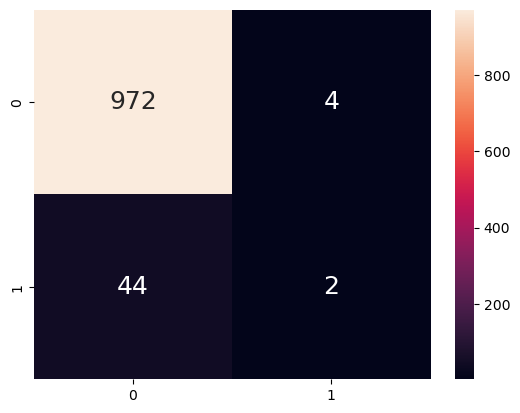

In [10]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

Although the classification accuracy of train and test data seem relatively high, it is misleading because there is a very high false negative rate, which is the model predicting a patient has no stroke but the patient has a stroke. This results from the large 'No Stroke' vs 'Stroke' class imbalance. This leads to the model predicting 'No Stroke' majority of the time for a given patient. This model can be further improved by rectifying the class imbalance

# Balance the class imbalance of 'Stroke' vs 'No Stroke'

In [11]:
dataStroke = data_ohe[data_ohe.stroke == 1]
dataNoStroke = data_ohe[data_ohe.stroke == 0]
 
dataStroke_up = resample(dataStroke, 
                        replace=True,                     # sample with replacement
                        n_samples=dataNoStroke.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up = pd.concat([dataStroke_up, dataNoStroke])
 
# Check the ratio of the classes
data_ohe_up['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [12]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 85 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9722 non-null   float64
 1   avg_glucose_level               9722 non-null   float64
 2   bmi                             9722 non-null   float64
 3   ever_married_No                 9722 non-null   float64
 4   ever_married_Yes                9722 non-null   float64
 5   work_type_Govt_job              9722 non-null   float64
 6   work_type_Never_worked          9722 non-null   float64
 7   work_type_Private               9722 non-null   float64
 8   work_type_Self-employed         9722 non-null   float64
 9   work_type_children              9722 non-null   float64
 10  Residence_type_Rural            9722 non-null   float64
 11  Residence_type_Urban            9722 non-null   float64
 12  smoking_status_Unknown          9

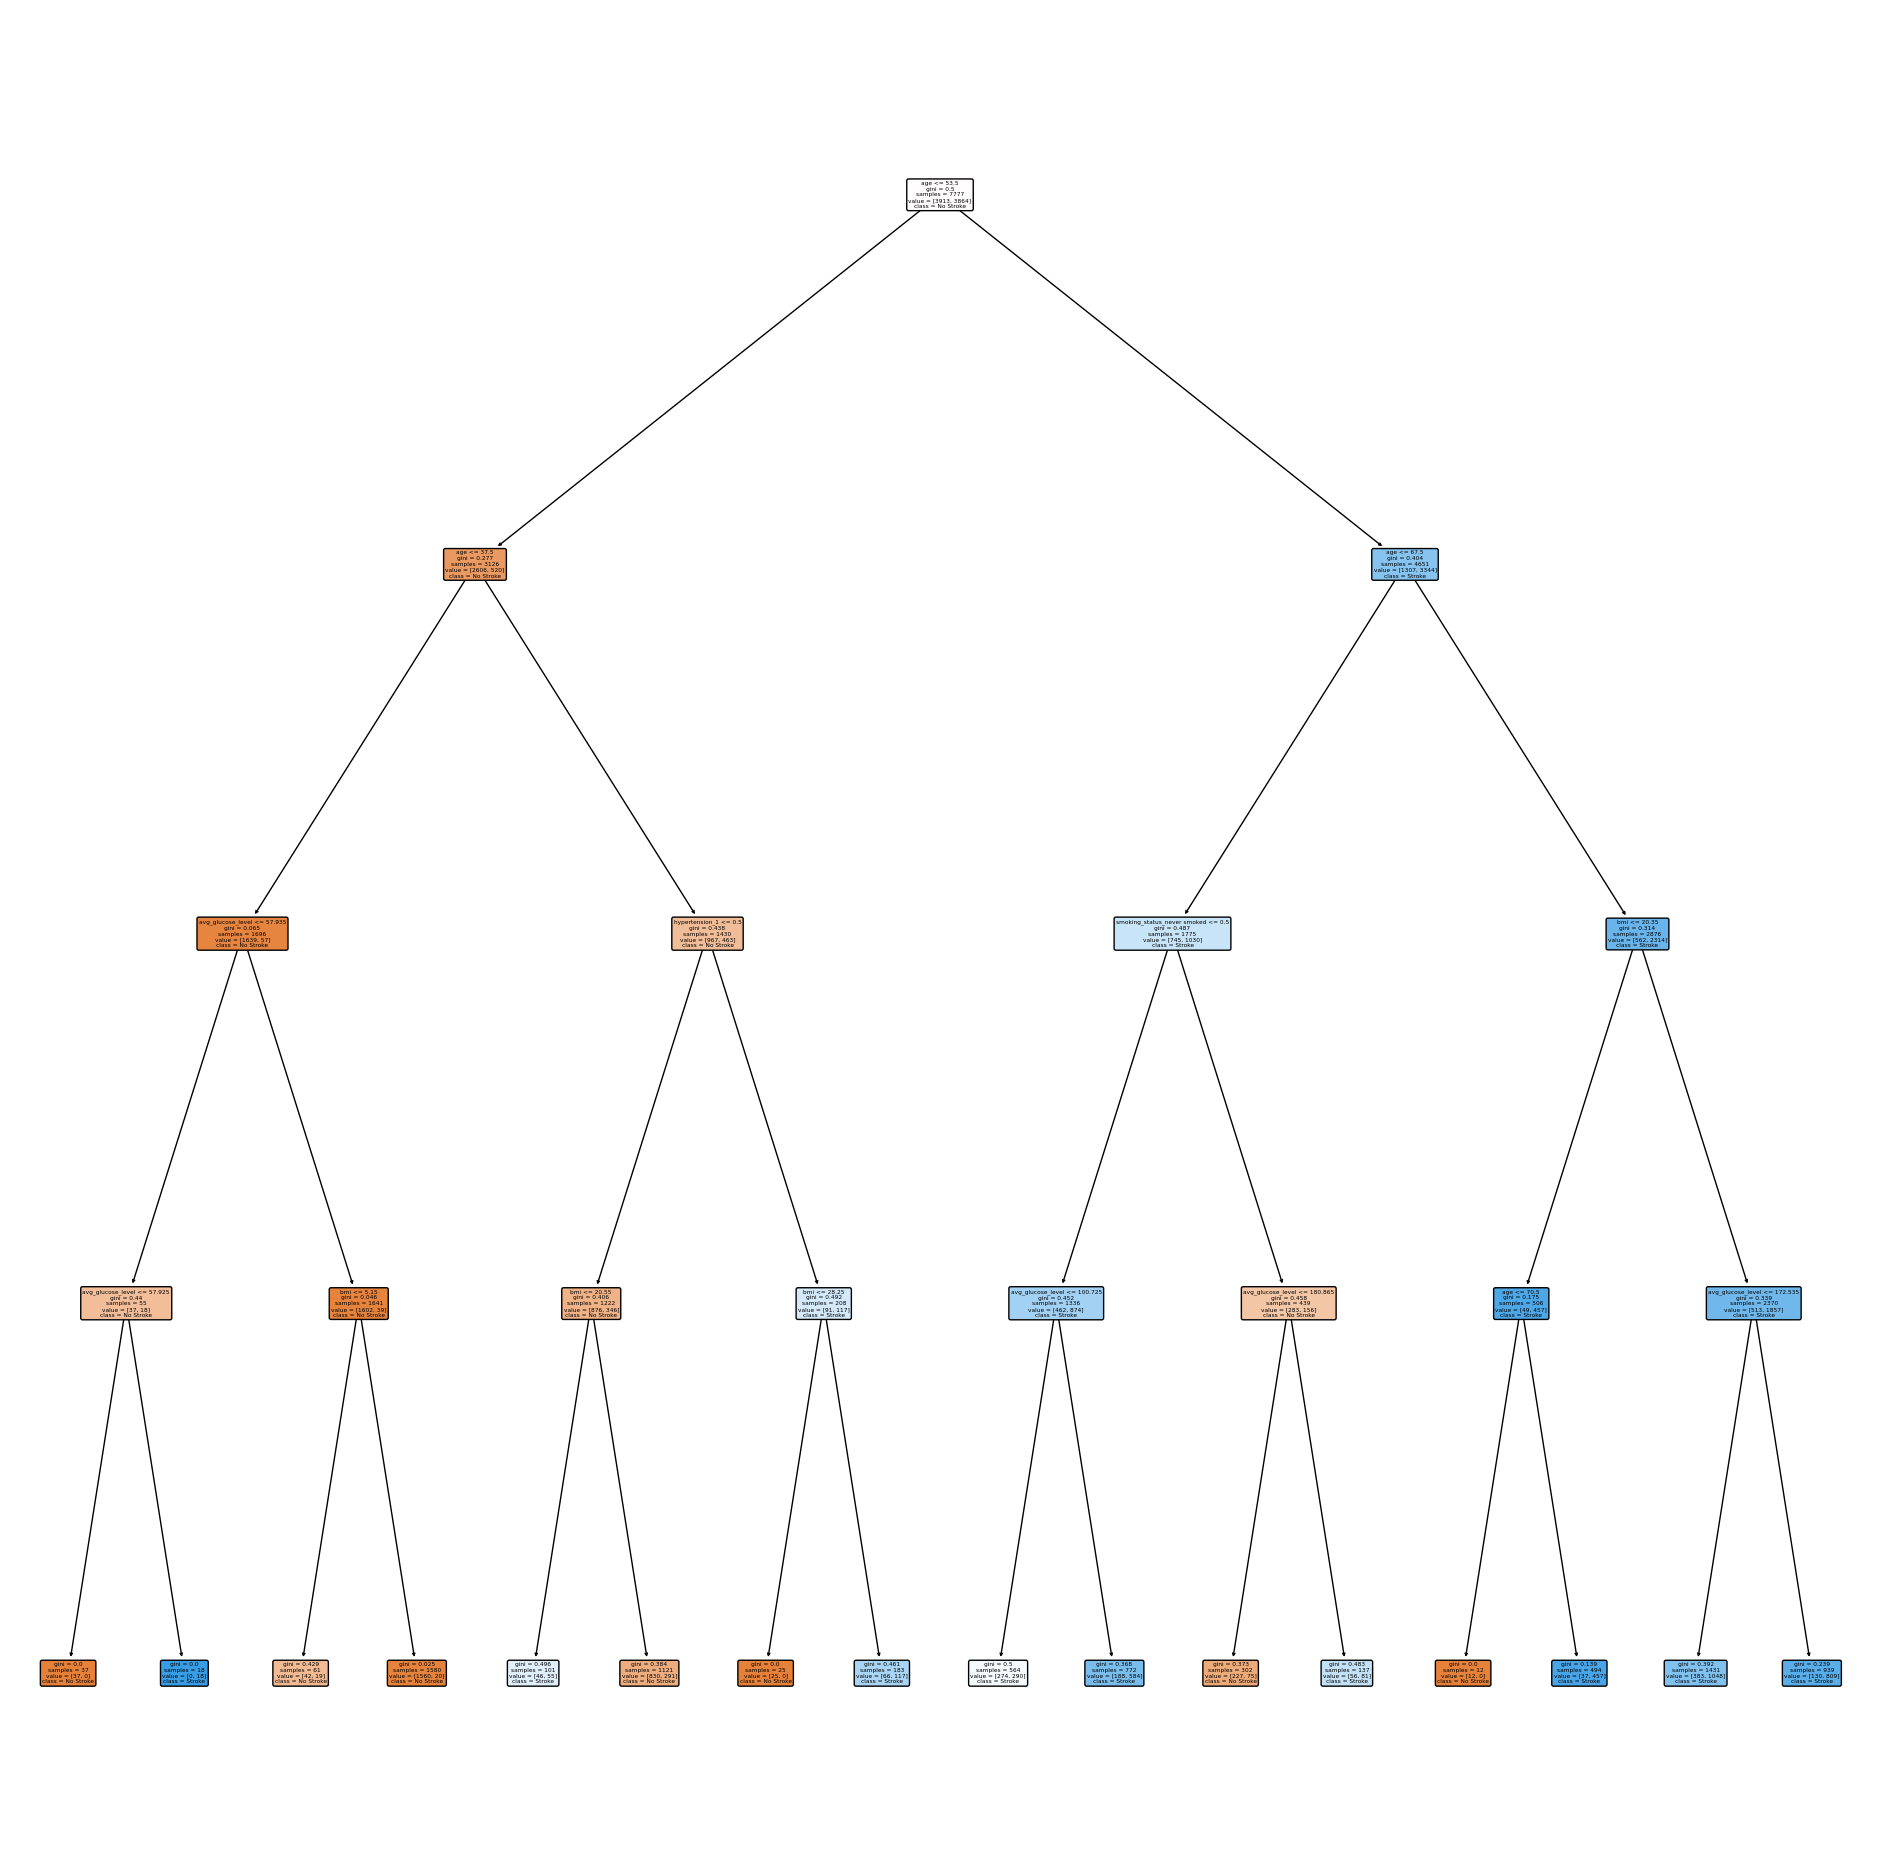

In [13]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No Stroke","Stroke"])
plt.show()

# Checking the accuracy of the model

Classification accuracy and all other accuracy measures from Confusion Matrix.

Train Data
Accuracy  :	 0.7961939051047962

TPR Train :	 0.8951863354037267
TNR Train :	 0.698441093789931

FPR Train :	 0.301558906210069
FNR Train :	 0.1048136645962733


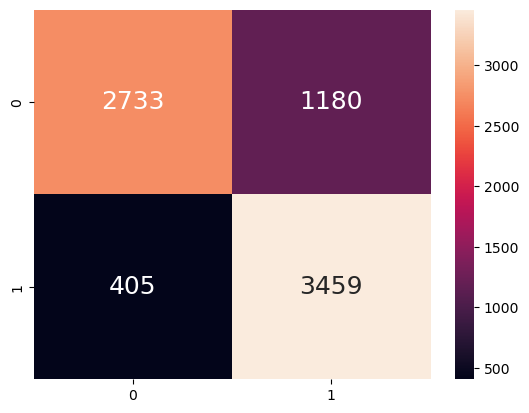

In [14]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.8041131105398458

TPR Test :	 0.9097291875626881
TNR Test :	 0.6930379746835443

FPR Test :	 0.3069620253164557
FNR Test :	 0.09027081243731194


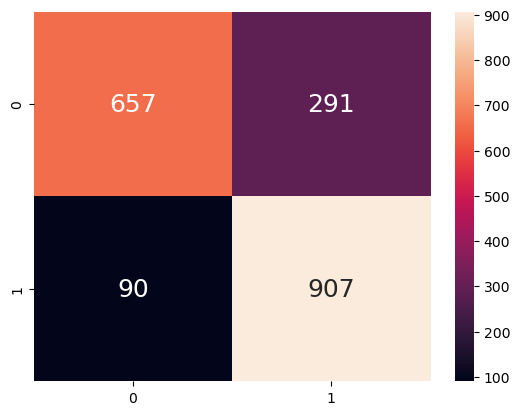

In [15]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

Based on train and test data, it seems that the False Positive Rates is still relatively high at about 25%. This model can be further improved

# Implementing random forest 

Random Forest uses an ensemble of trees for better classification.

In [16]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.stroke.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.7816638806737817

TPR Train :	 0.8823377960865088
TNR Train :	 0.6812227074235808

FPR Train :	 0.31877729257641924
FNR Train :	 0.11766220391349125


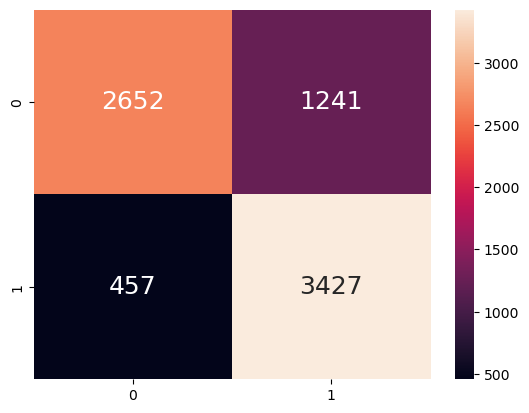

In [18]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.777892030848329

TPR Test :	 0.8894575230296827
TNR Test :	 0.6652892561983471

FPR Test :	 0.3347107438016529
FNR Test :	 0.1105424769703173


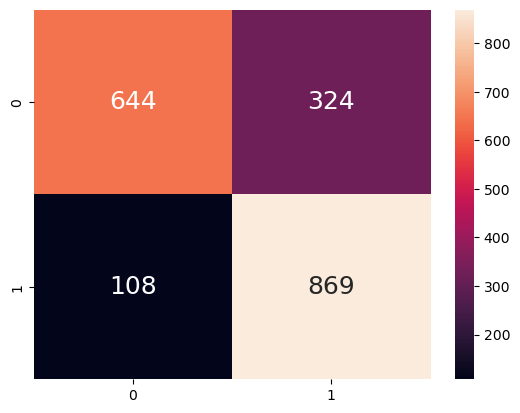

In [19]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

By implementing Random Forest classification, it seems that the classification accuracy improves slightly. However, there is still a trend of relatively high False Positive Rates across Model 2 and 3. The random forest tree can be further improved by increasing the number of trees and its maximum depth.

In [22]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.stroke.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9504775900073476

TPR Train :	 0.9745241581259151
TNR Train :	 0.9262536873156342

FPR Train :	 0.07374631268436578
FNR Train :	 0.025475841874084918


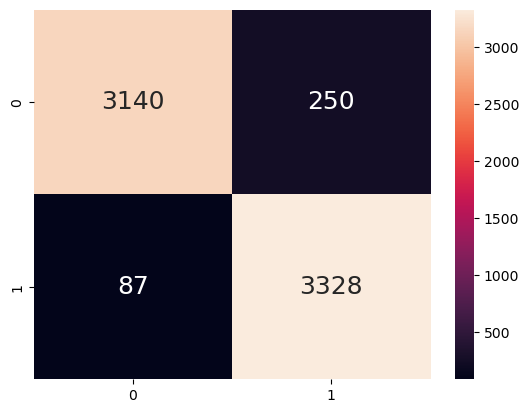

In [23]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.929379499485773

TPR Test :	 0.9702627939142462
TNR Test :	 0.8891910265125765

FPR Test :	 0.11080897348742352
FNR Test :	 0.029737206085753802


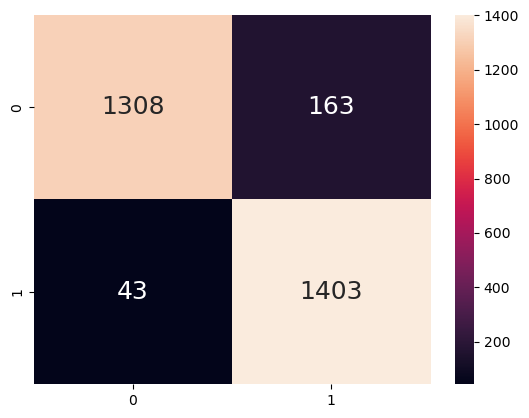

In [24]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights

The classification accuracy of increased decision trees and depth of decision trees has led to a high increase in classification accuracy of around 95%. However, doing so may lead to overfitting of data due to the complexity of the model, which leads to poor generalisation of unseen data. The model may be further improved by fine tuning the number of decision trees and the depth of each tree, to obtain the ideal number

In [25]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.stroke.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [27]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=400)
0.9314659569016112


In [28]:
# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up['stroke'])
X = pd.DataFrame(data_ohe_up.drop('stroke', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 900,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.stroke.ravel())

RandomForestClassifier(max_depth=10, n_estimators=900)

Train Data
Accuracy  :	 0.9526809823839527

TPR Train :	 0.9849643221202854
TNR Train :	 0.9198027511030366

FPR Train :	 0.0801972488969634
FNR Train :	 0.015035677879714576


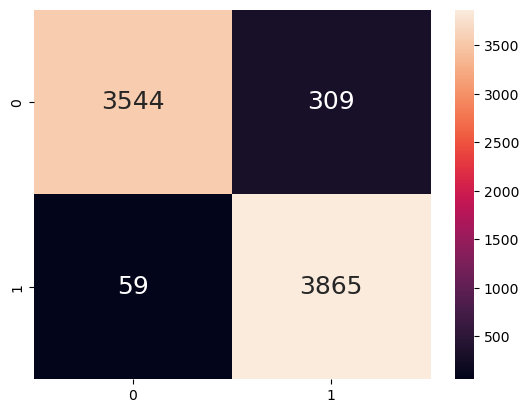

In [29]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

Test Data
Accuracy  :	 0.9280205655526992

TPR Test :	 0.9829242262540021
TNR Test :	 0.876984126984127

FPR Test :	 0.12301587301587301
FNR Test :	 0.017075773745997867
F1 score :	 0.929364278506559


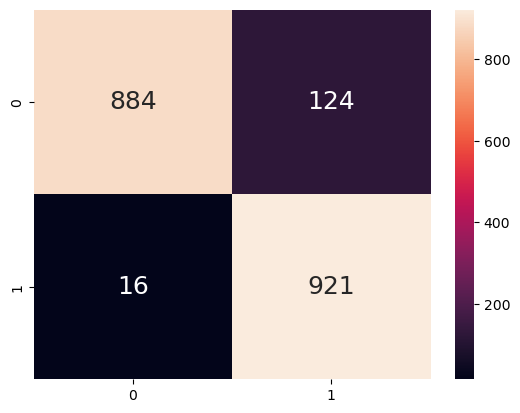

In [30]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
precision = tpTest/(tpTest+fpTest)
recall = tpTest/(tpTest+fnTest)
f1 = 2*(precision*recall)/(precision+recall)
print("F1 score :\t",f1)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

# Insights from fine tuned random forest tree
As shown in the train and test data, the classification accuracy is still relatively high. Notably, the False Positive Rates have reduced significantly compared to the previous models. From here, we want to investigate what are the most important factors in predicting whether a particular has a likelihood to have a stroke

In [31]:
%matplotlib inline
rforest.estimators_

[DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=2140959333),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=142669545),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1489554655),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=854542529),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=464560312),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=452130794),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=333742527),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=613687033),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1715669672),
 DecisionTreeClassifier(m

In [32]:
len(rforest.estimators_)

900

In [33]:
f = plt.figure(figsize=(100,100))
tree.plot_tree(rforest.estimators_[0],filled=True)
plt.show()

# Note
Note that the diagram readability is affected heavily due to the depth of the tree. The figure is only for a visual representation of how a random forest tree would look like, in contrast to the normal binary decision tree.

In [34]:
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 85 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9722 non-null   float64
 1   avg_glucose_level               9722 non-null   float64
 2   bmi                             9722 non-null   float64
 3   ever_married_No                 9722 non-null   float64
 4   ever_married_Yes                9722 non-null   float64
 5   work_type_Govt_job              9722 non-null   float64
 6   work_type_Never_worked          9722 non-null   float64
 7   work_type_Private               9722 non-null   float64
 8   work_type_Self-employed         9722 non-null   float64
 9   work_type_children              9722 non-null   float64
 10  Residence_type_Rural            9722 non-null   float64
 11  Residence_type_Urban            9722 non-null   float64
 12  smoking_status_Unknown          9

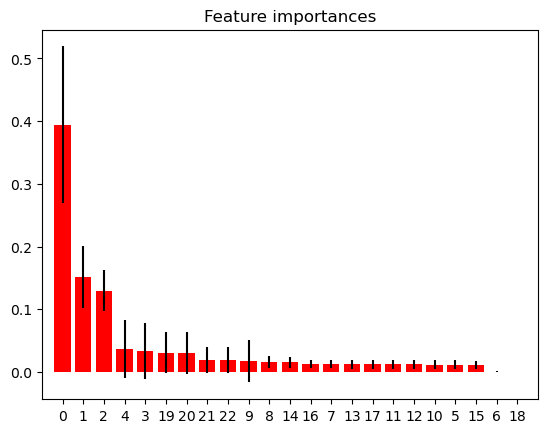

In [35]:
importances = rforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Insights from optimised parameters in Random Forest 
From the bar chart above, the features are sorted in descending order to highlight the most important features. Based on the bar chart, the top 3 factors in affecting stroke are features 0,1,2. With reference to the features list above, they correspond to age, average glucose level and BMI. Hence, from performing random forest and fine tuning the parameters, we can find out the most important factors that relates to having a stroke.